In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt 
import plotly as py 
import plotly.graph_objs as go 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv('Births2015.csv')  #read file


In [4]:
df = df[['date', 'births','year', 'month' ,'day_of_year' ,'day_of_month' ,'day_of_week']].copy()
df['date'] = pd.to_datetime(df['date'])
df.describe()

,date,births,year,month,day_of_year,day_of_month,day_of_week
count,365,365.000000,365.0,365.000000,365.000000,365.000000,365.000000
mean,2015-07-02 00:00:00,10899.991781,2015.0,6.526027,183.000000,15.720548,4.002740
min,2015-01-01 00:00:00,6515.000000,2015.0,1.000000,1.000000,1.000000,1.000000
25%,2015-04-02 00:00:00,8431.000000,2015.0,4.000000,92.000000,8.000000,2.000000
50%,2015-07-02 00:00:00,11883.000000,2015.0,7.000000,183.000000,16.000000,4.000000
75%,2015-10-01 00:00:00,12339.000000,2015.0,10.000000,274.000000,23.000000,6.000000
max,2015-12-31 00:00:00,13949.000000,2015.0,12.000000,365.000000,31.000000,7.000000
std,NaN,2076.683881,0.0,3.452584,105.510663,8.808321,2.000685


In [5]:
df.isnull().sum()

date            0
births          0
year            0
month           0
day_of_year     0
day_of_month    0
day_of_week     0
dtype: int64

In [6]:
df_train = df.head(335).copy()
df_train
df_test= df.iloc[335:]


Text(0.5, 1.0, 'Number of Births in Relation to the Day of the Year')

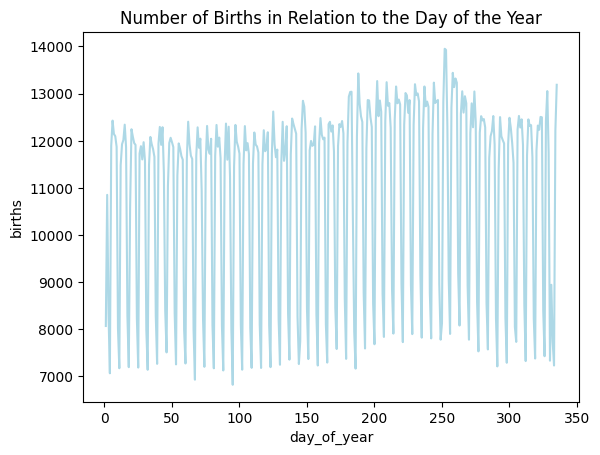

In [7]:
sns.lineplot(x = "day_of_year" , y = "births", data = df_train, color = 'lightblue')
plt.title('Number of Births in Relation to the Day of the Year')

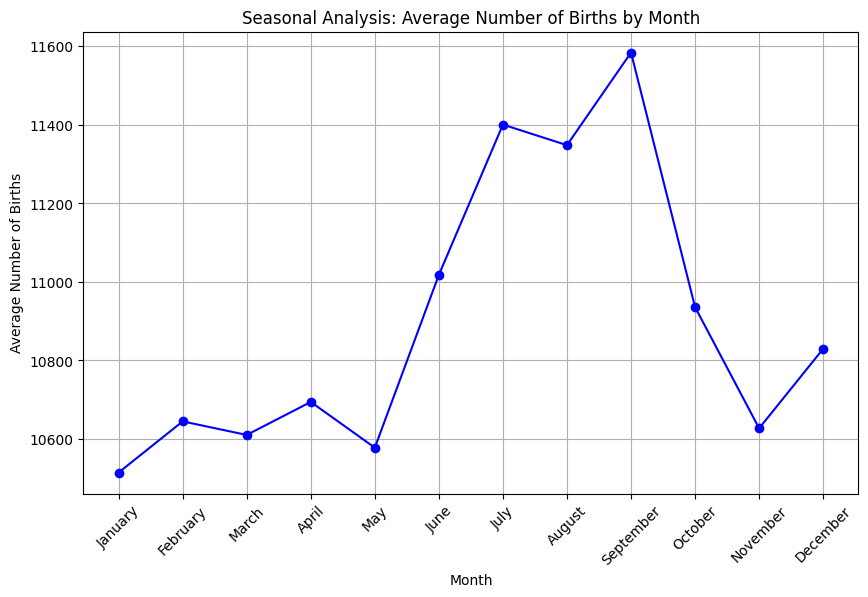

In [8]:

# Calculate the average number of births per month
average_births_by_month = df.groupby('month')['births'].mean()

# Define the names of the months (optional)
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot the average number of births by month
plt.figure(figsize=(10, 6))
plt.plot(average_births_by_month.index, average_births_by_month.values, marker='o', linestyle='-', color='blue')
plt.xticks(range(1, 13), month_names, rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Number of Births')
plt.title('Seasonal Analysis: Average Number of Births by Month')
plt.grid(True)
plt.show()


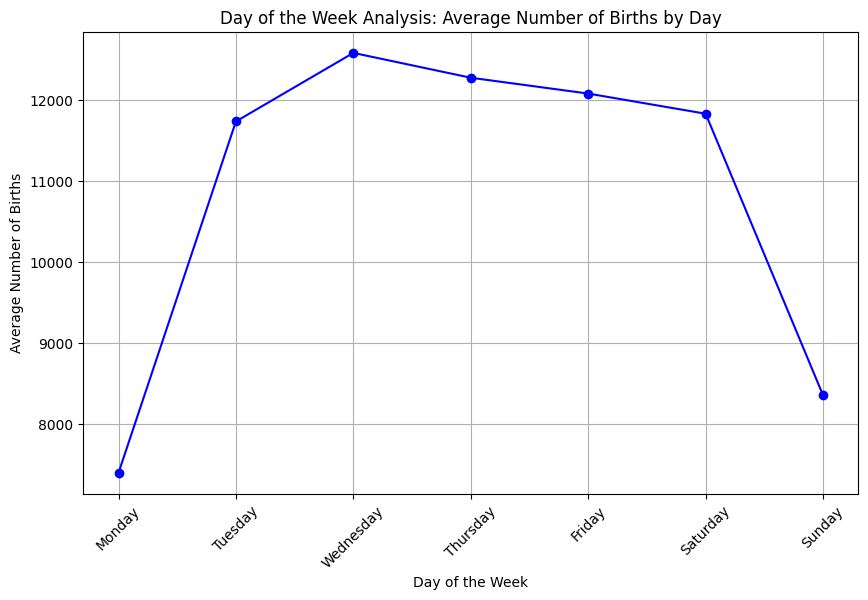

In [9]:

# Calculate the average number of births per day of the week
average_births_by_day = df.groupby('day_of_week')['births'].mean()

# Define the names of the days of the week (optional)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the average number of births by day of the week
plt.figure(figsize=(10, 6))
plt.plot(average_births_by_day.index, average_births_by_day.values, marker='o', linestyle='-', color='blue')
plt.xticks(range(1,8), day_names, rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Births')
plt.title('Day of the Week Analysis: Average Number of Births by Day')
plt.grid(True)
plt.show()


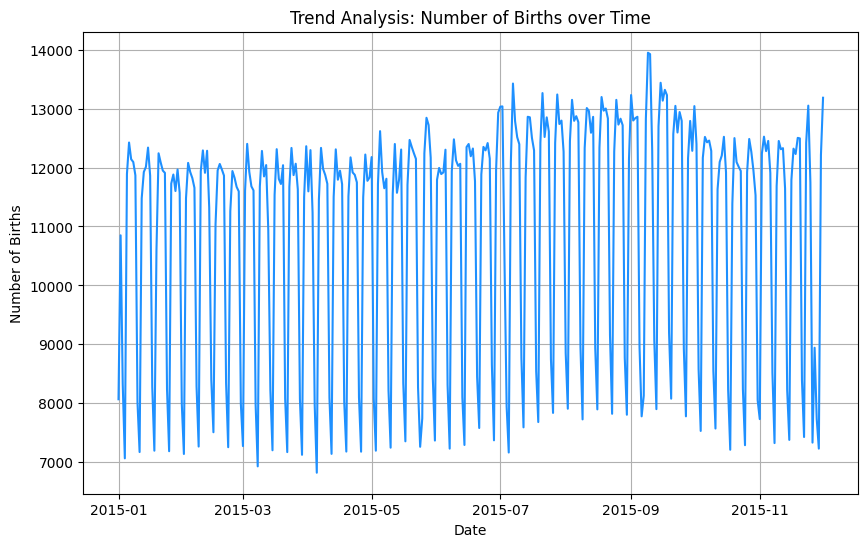

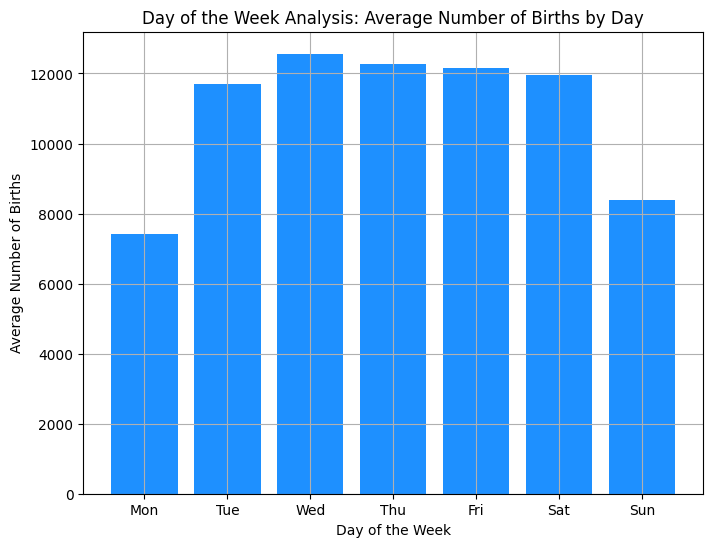

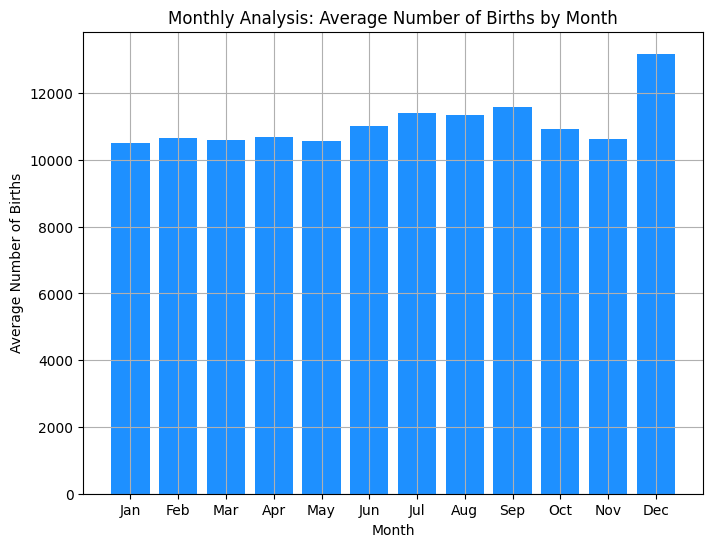

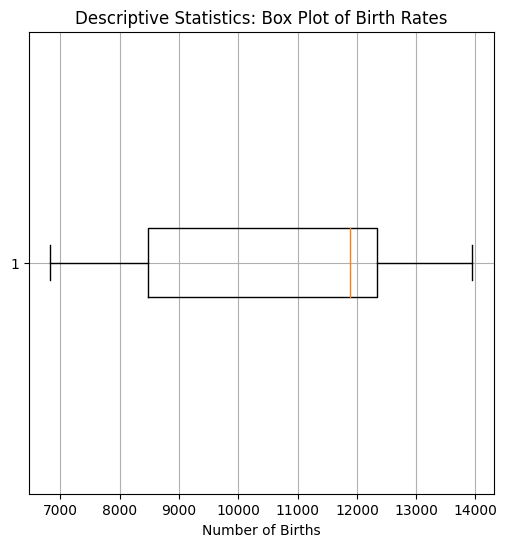

In [10]:
# Trend Analysis - Number of births over time
plt.figure(figsize=(10, 6))
plt.plot(df_train['date'], df_train['births'], color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.title('Trend Analysis: Number of Births over Time')
plt.grid(True)
plt.show()

# Day of the Week Analysis - Average number of births by day of the week
avg_births_by_day = df_train.groupby('day_of_week')['births'].mean()

plt.figure(figsize=(8, 6))
plt.bar(avg_births_by_day.index, avg_births_by_day.values, color='dodgerblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Births')
plt.title('Day of the Week Analysis: Average Number of Births by Day')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

# Monthly Analysis - Average number of births by month
avg_births_by_month = df_train.groupby('month')['births'].mean()

plt.figure(figsize=(8, 6))
plt.bar(avg_births_by_month.index, avg_births_by_month.values, color='dodgerblue')
plt.xlabel('Month')
plt.ylabel('Average Number of Births')
plt.title('Monthly Analysis: Average Number of Births by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


# Descriptive Statistics - Box plot of birth rates
plt.figure(figsize=(6, 6))
plt.boxplot(df_train['births'], vert=False)
plt.xlabel('Number of Births')
plt.title('Descriptive Statistics: Box Plot of Birth Rates')
plt.grid(True)
plt.show()


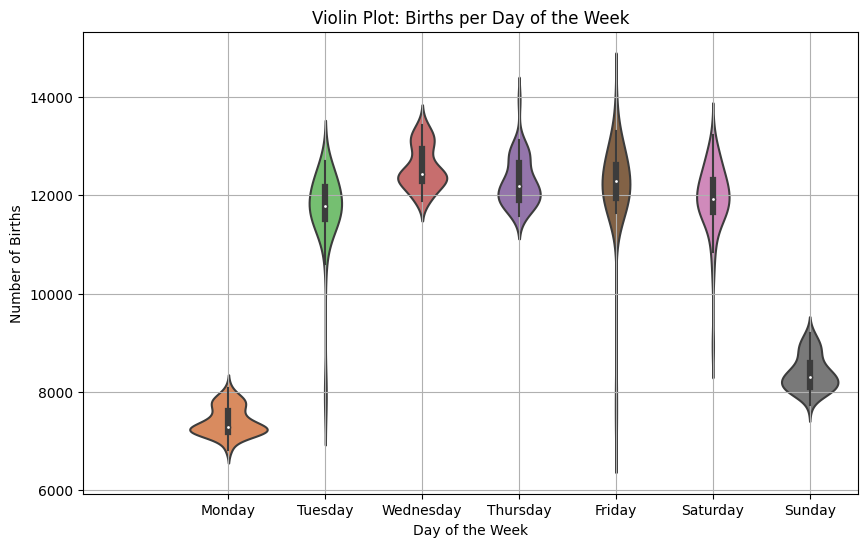

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_week', y='births', data=df_train, order=range(0,8), palette='muted')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Births')
plt.title('Violin Plot: Births per Day of the Week')
plt.xticks(range(1,8), day_names)
plt.grid(True)
plt.show()

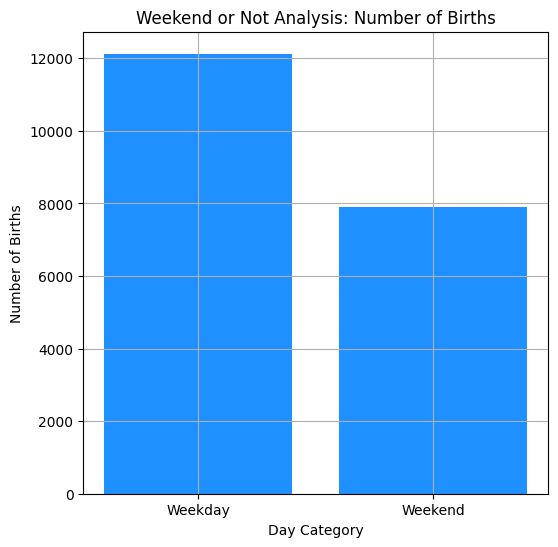

In [12]:
# Create a new column indicating if the day is a weekend or not
df_train['weekend'] = df_train['date'].dt.weekday // 5 == 1

# Count the number of births on weekends and weekdays
births_by_weekend = df_train.groupby('weekend')['births'].mean()

plt.figure(figsize=(6, 6))
plt.bar(births_by_weekend.index.map({False: 'Weekday', True: 'Weekend'}), births_by_weekend.values, color='dodgerblue')
plt.xlabel('Day Category')
plt.ylabel('Number of Births')
plt.title('Weekend or Not Analysis: Number of Births')
plt.grid(True)
plt.show()


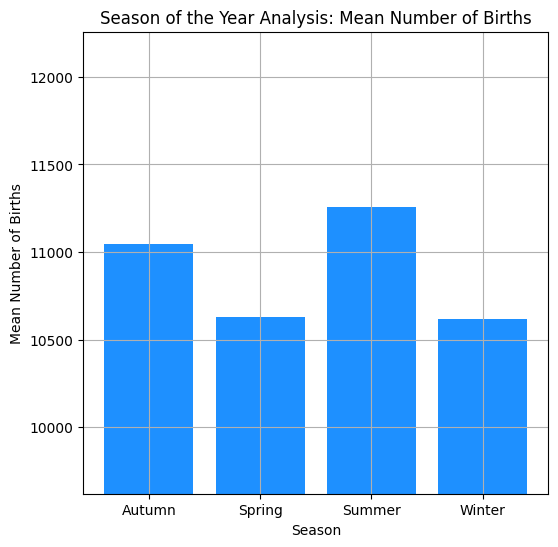

In [13]:
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer',
           8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
df_train['season'] = df_train['month'].map(seasons)

# Calculate the mean birth value for each season
mean_births_by_season = df_train.groupby('season')['births'].mean()

plt.figure(figsize=(6, 6))
plt.bar(mean_births_by_season.index, mean_births_by_season.values, color='dodgerblue')
plt.xlabel('Season')
plt.ylabel('Mean Number of Births')
plt.title('Season of the Year Analysis: Mean Number of Births')
plt.grid(True)
y_min = mean_births_by_season.min() - 1000  # Adjust the value as needed
y_max = mean_births_by_season.max() + 1000  # Adjust the value as needed
plt.ylim(y_min, y_max)
plt.show()


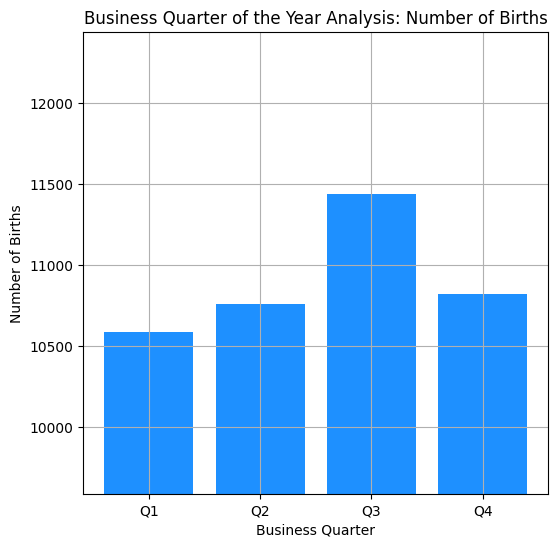

In [14]:
# Define business quarters
quarters = {1: 'Q1', 2: 'Q1', 3: 'Q1', 4: 'Q2', 5: 'Q2', 6: 'Q2', 7: 'Q3', 8: 'Q3', 9: 'Q3', 10: 'Q4', 11: 'Q4', 12: 'Q4'}
df_train['quarter'] = df_train['month'].map(quarters)

# Count the number of births by business quarter
births_by_quarter = df_train.groupby('quarter')['births'].mean()


plt.figure(figsize=(6, 6))
plt.bar(births_by_quarter.index, births_by_quarter.values, color='dodgerblue')
plt.xlabel('Business Quarter')
plt.ylabel('Number of Births')
plt.title('Business Quarter of the Year Analysis: Number of Births')
plt.grid(True)

# Set the y-axis limits
y_min = births_by_quarter.min() - 1000  # Adjust the value as needed
y_max = births_by_quarter.max() + 1000  # Adjust the value as needed
plt.ylim(y_min, y_max)

plt.show()


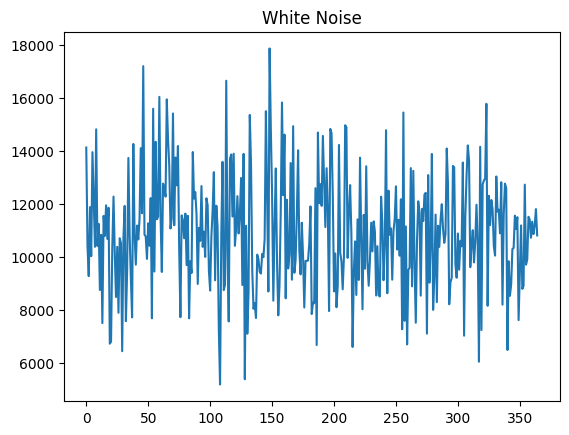

In [15]:
#WHITE NOISE (is staionary)
wn= np.random.normal(loc= df.births.mean(), scale = df.births.std(), size=len(df))  #normal distribution
wn_df = df.copy()
wn_df['wn'] = wn
wn_df.wn.plot()
plt.title("White Noise")
plt.show()

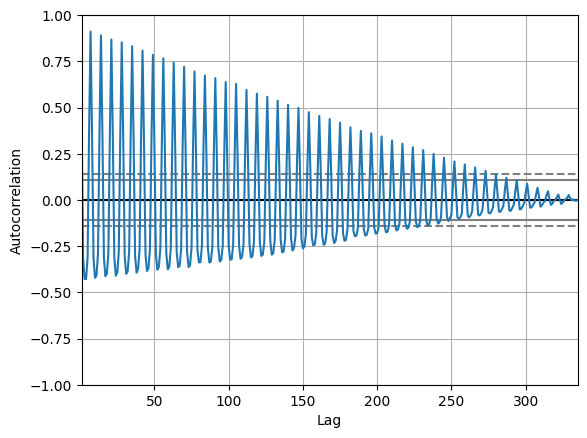

In [16]:
#df.set_index("births")
autocorrelation_plot(df_train['births'])
plt.show()

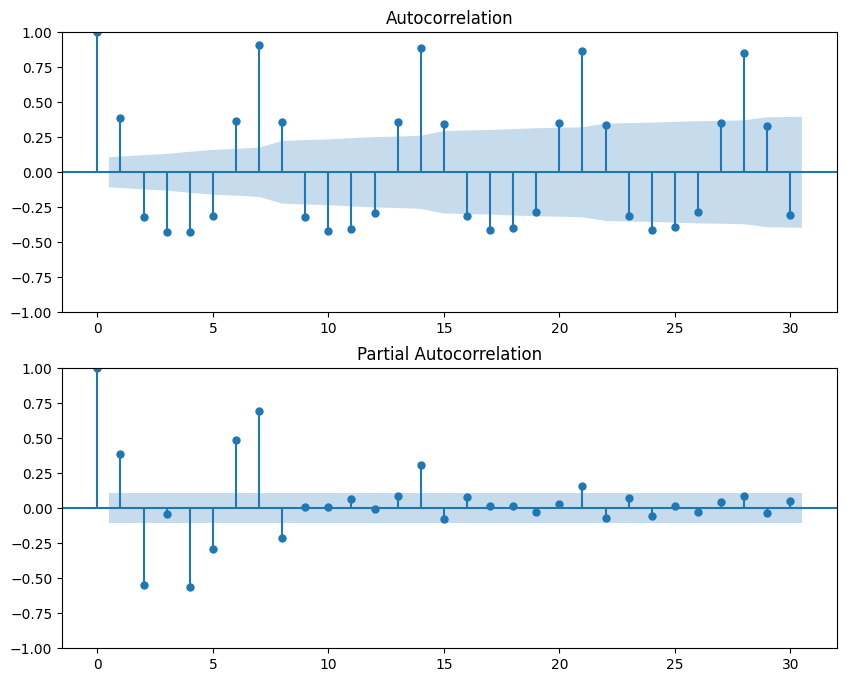

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df_train["births"], ax=ax1, lags=30)
plot_pacf(df_train["births"], ax=ax2, lags=30) #direct effect coefficients
plt.show()  #confidence interval not significant
#direct and indirect dependence information
#direct relationship - pacf

<Figure size 1200x800 with 0 Axes>

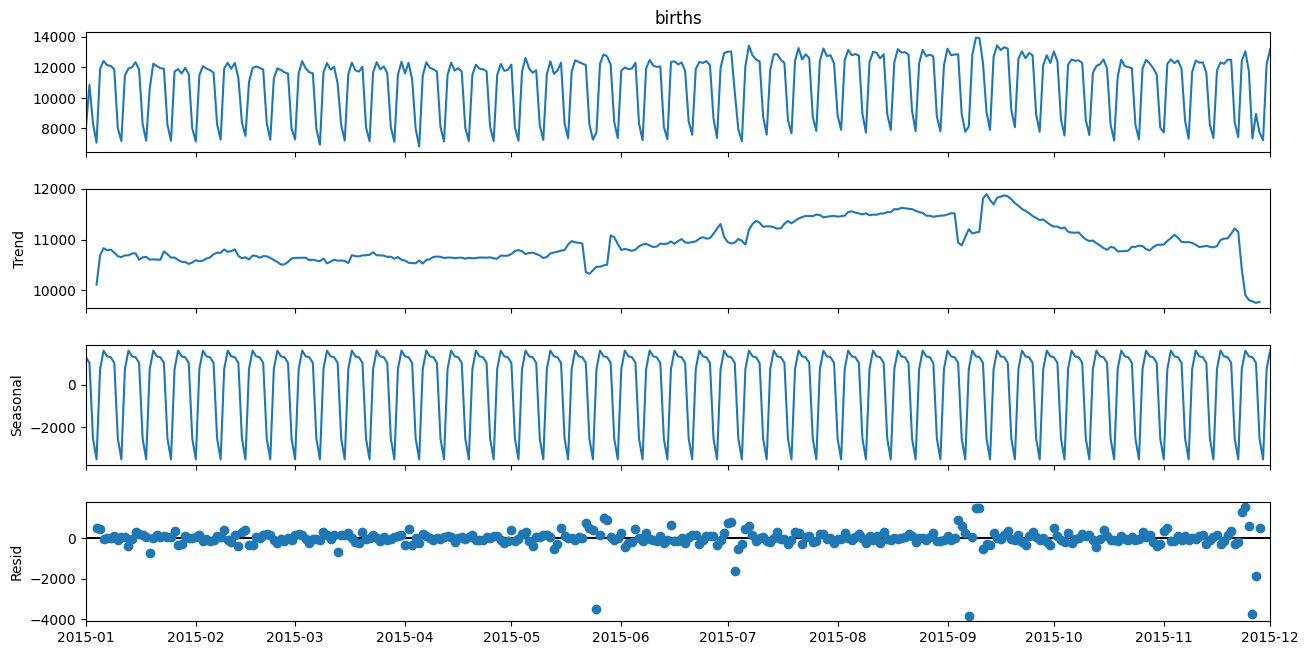

In [19]:
df_train['date'] = pd.to_datetime(df_train['date'])

df_train.set_index('date', inplace=True)

# Perform seasonal decomposition with an additive model and period=7 (for weekly seasonality)
s_dec_additive = sm.tsa.seasonal_decompose(df_train['births'], model='additive', period=7)

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomp_f = s_dec_additive.plot()
decomp_f.set_size_inches(15, 7)
plt.show()

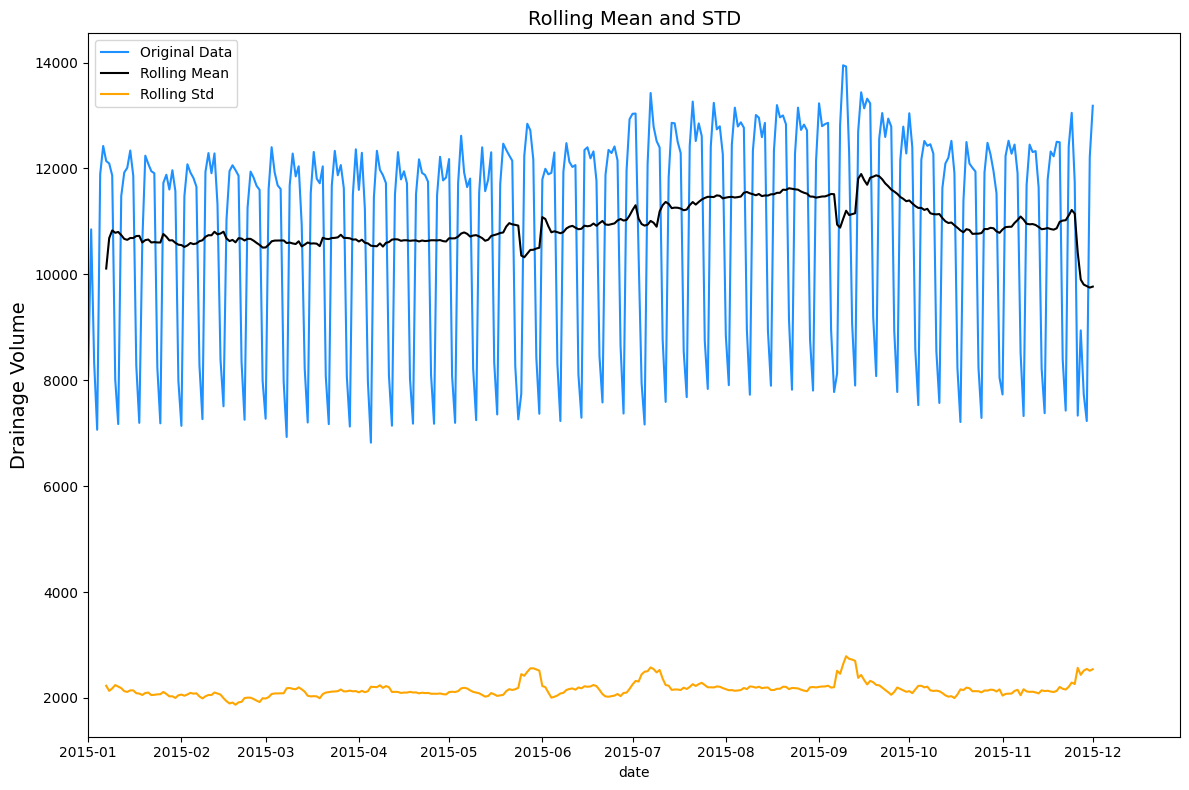

In [20]:

rolling_window = 7

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the original data, rolling mean, and rolling std
sns.lineplot(x='date', y='births', data=df_train, ax=ax, color='dodgerblue', label='Original Data')
sns.lineplot(x='date', y=df_train['births'].rolling(rolling_window).mean(), data=df_train, ax=ax, color='black', label='Rolling Mean')
sns.lineplot(x='date', y=df_train['births'].rolling(rolling_window).std(), data=df_train, ax=ax, color='orange', label='Rolling Std')

# Set plot titles and labels
ax.set_title('Rolling Mean and STD', fontsize=14)
ax.set_ylabel(ylabel='Drainage Volume', fontsize=14)
ax.set_xlim([pd.to_datetime('2015-01-01'), pd.to_datetime('2015-12-30')])

# Show legend
ax.legend()

plt.tight_layout()
plt.show()


In [21]:

def DF_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "Lags Used",
            "Number of Samples",
        ],
    )
    for k, val in dftest[4].items():
        dfoutput["Critical Value (%s)" % k] = val
    print(dfoutput)
    if dfoutput["p-value"] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

In [22]:
DF_test(df_train.births)

Results of Dickey-Fuller Test:
Test Statistic           -1.038551
p-value                   0.738945
Lags Used                14.000000
Number of Samples       320.000000
Critical Value (1%)      -3.450952
Critical Value (5%)      -2.870615
Critical Value (10%)     -2.571605
dtype: float64
Data is not stationary


In [27]:
df_train = df_train.drop(columns = ['weekend', 'season', 'quarter'], axis = 1)


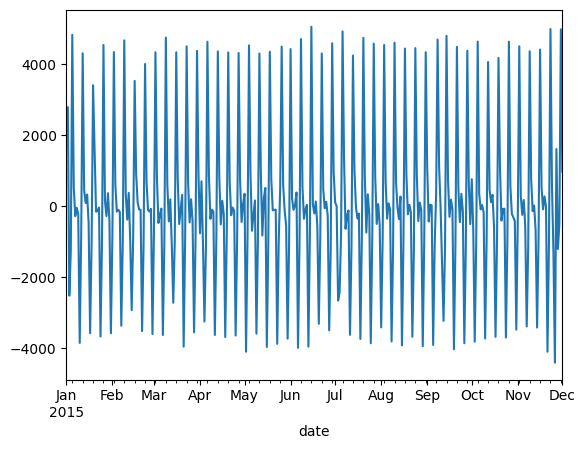

Results of Dickey-Fuller Test:
Test Statistic         -7.825572e+00
p-value                 6.495589e-12
Lags Used               1.300000e+01
Number of Samples       3.200000e+02
Critical Value (1%)    -3.450952e+00
Critical Value (5%)    -2.870615e+00
Critical Value (10%)   -2.571605e+00
dtype: float64
Data is stationary


In [28]:
df_train.reset_index()
series1= df_train.diff()
series1['births'].plot()
plt.show()
DF_test(series1.dropna().births)

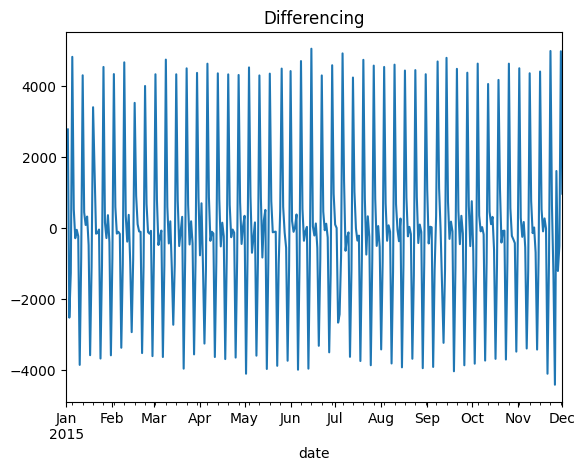

KeyError: "['date'] not in index"

In [29]:
df_train['births_diff'] =  df_train['births'] - df_train['births'].shift(1)
df_train['births_diff'].plot()
plt.title("Differencing")
plt.show()

df_diff = df_train.dropna(subset=['births_diff'])[['date', 'births_diff']].copy()

DF_test(df_diff.births_diff)

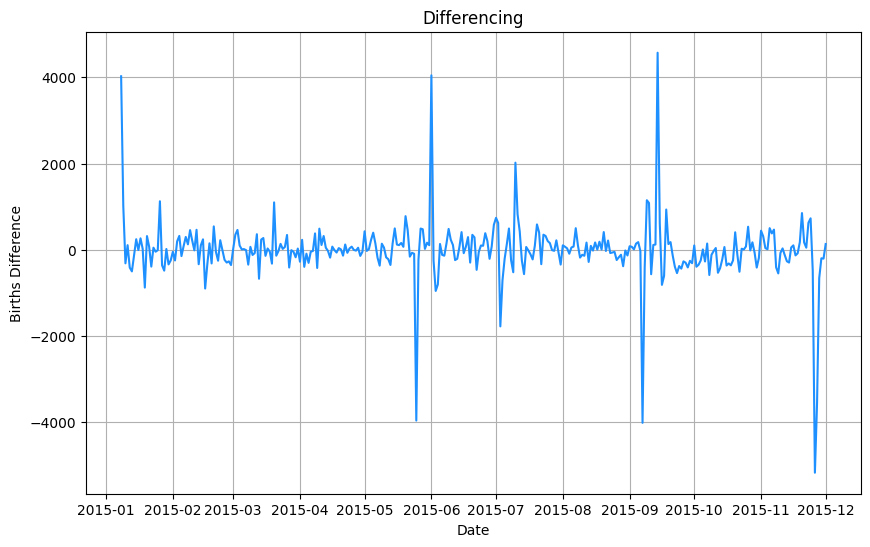

Results of Dickey-Fuller Test:
Test Statistic           -4.897336
p-value                   0.000035
Lags Used                14.000000
Number of Samples       313.000000
Critical Value (1%)      -3.451416
Critical Value (5%)      -2.870819
Critical Value (10%)     -2.571714
dtype: float64
Data is stationary


In [79]:
df_train['births_diff7'] = df_train['births'] - df_train['births'].shift(7)

# Drop NaN values resulting from the differencing and create a new DataFrame
df_diff = df_train.dropna(subset=['births_diff7'])[['date', 'births_diff7']].copy()

# Plot births_diff
plt.figure(figsize=(10, 6))
plt.plot(df_diff['date'], df_diff['births_diff7'], color='dodgerblue')
plt.title("Differencing")
plt.xlabel('Date')
plt.ylabel('Births Difference')
plt.grid(True)
plt.show()
DF_test(df_diff.births_diff7)

In [80]:
df_train

,date,births,year,month,day_of_year,day_of_month,day_of_week,births_diff,births_diff7
0,2015-01-01,8068,2015,1,1,1,5,NaN,NaN
1,2015-01-02,10850,2015,1,2,2,6,2782.0,NaN
2,2015-01-03,8328,2015,1,3,3,7,-2522.0,NaN
3,2015-01-04,7065,2015,1,4,4,1,-1263.0,NaN
4,2015-01-05,11892,2015,1,5,5,2,4827.0,NaN
...,...,...,...,...,...,...,...,...,...
330,2015-11-27,8942,2015,11,331,27,6,1610.0,-3553.0
331,2015-11-28,7734,2015,11,332,28,7,-1208.0,-658.0
332,2015-11-29,7230,2015,11,333,29,1,-504.0,-197.0
333,2015-11-30,12214,2015,11,334,30,2,4984.0,-205.0


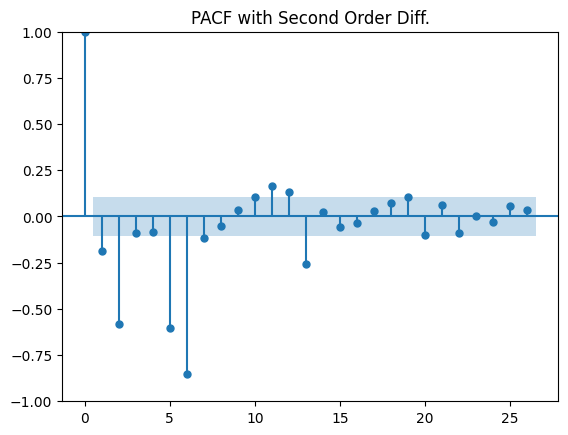

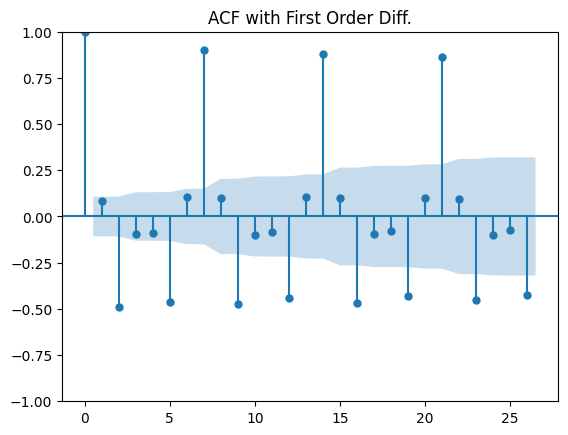

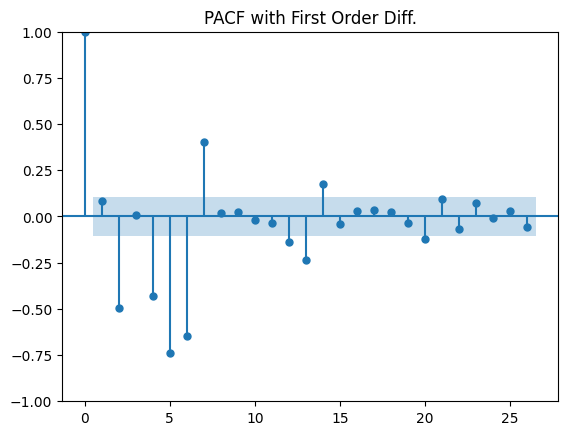

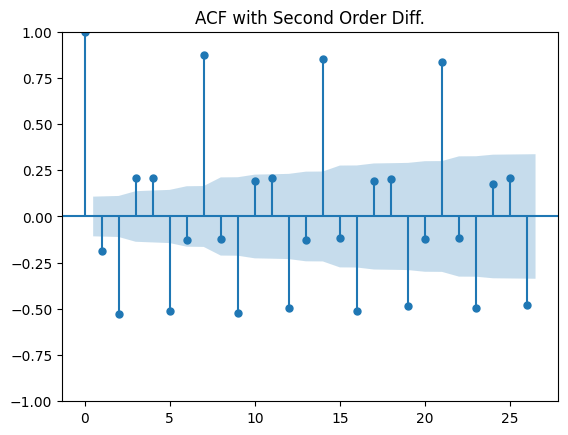

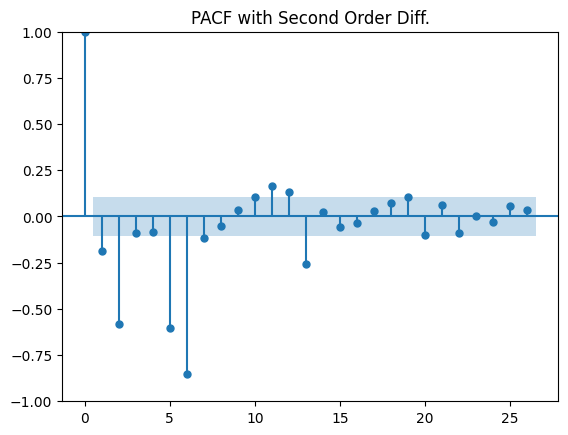

In [81]:
### First order diff
plot_acf(df_train['births'].diff().dropna(),alpha=.05,title = "ACF with First Order Diff.")
plot_pacf(df_train['births'].diff().dropna(),alpha=.05,title = "PACF with First Order Diff.")
### Second order diff
plot_acf(df_train['births'].diff().diff().dropna(),alpha=.05,title = "ACF with Second Order Diff.")
plot_pacf(df_train['births'].diff().diff().dropna(),alpha=.05,title = "PACF with Second Order Diff.")

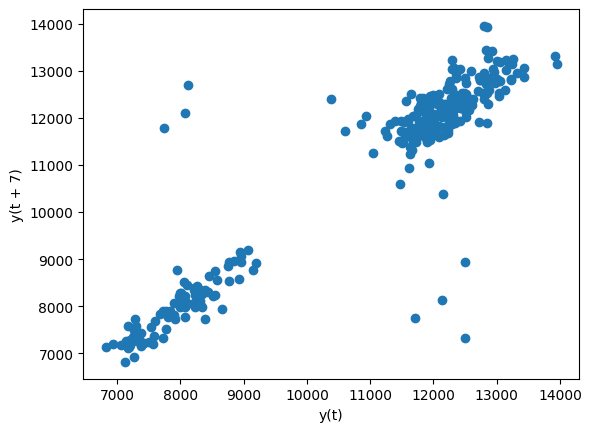

In [82]:
lag_plot(df_train['births'], lag=7)
plt.show()

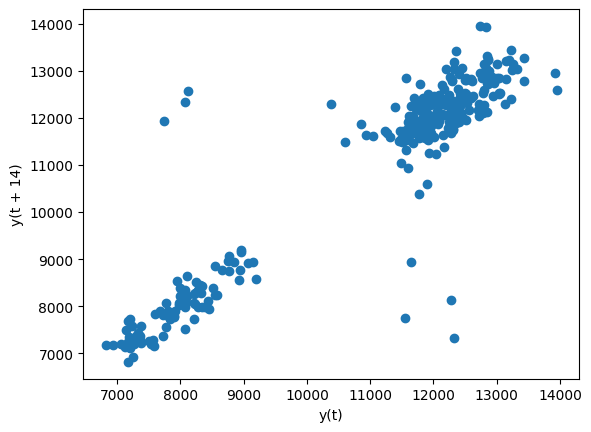

In [83]:
lag_plot(df_train['births'], lag=14)
plt.show()

In [99]:
df_train['lag7_births'] = df_train['births'].shift(periods=7)
#df_train['lag2_births'] = df_train['births'].shift(periods=2)
df_train['lag4_births'] = df_train['births'].shift(periods=4)
df_train['lag6_births'] = df_train['births'].shift(periods=6)

df_train.corr()

,date,births,year,month,day_of_year,day_of_month,day_of_week,births_diff,births_diff7,lag7_births,lag2_births,lag4_births,lag6_births,month_sin,month_cos,quarter,season
date,1.000000,0.099156,NaN,0.995841,1.000000,0.089977,-1.035607e-02,-0.001316,-0.102948,0.125108,0.091197,0.110424,0.126587,-0.864385,0.014553,9.654265e-01,0.948922
births,0.099156,1.000000,NaN,0.100672,0.099156,-0.011088,1.058170e-01,0.551471,0.188818,0.938723,-0.318528,-0.437568,0.377908,-0.135323,-0.064916,9.070723e-02,0.100732
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.995841,0.100672,NaN,1.000000,0.995841,-0.000836,-1.270639e-02,0.000737,-0.091399,0.123510,0.090165,0.108475,0.128598,-0.865727,0.010938,9.688919e-01,0.951719
day_of_year,1.000000,0.099156,NaN,0.995841,1.000000,0.089977,-1.035607e-02,-0.001316,-0.102948,0.125108,0.091197,0.110424,0.126587,-0.864385,0.014553,9.654265e-01,0.948922
day_of_month,0.089977,-0.011088,NaN,-0.000836,0.089977,1.000000,2.454131e-02,-0.022705,-0.122333,0.016736,0.015448,0.023798,-0.021811,-0.012680,-0.018857,3.491244e-03,0.018077
day_of_week,-0.010356,0.105817,NaN,-0.012706,-0.010356,0.024541,1.000000e+00,-0.557149,-0.017492,0.116921,0.470195,-0.164075,-0.749772,-0.005257,0.004528,2.350200e-16,-0.009804
births_diff,-0.001316,0.551471,NaN,0.000737,-0.001316,-0.022705,-5.571494e-01,1.000000,0.129844,0.509619,-0.641317,-0.004912,0.629624,0.006386,0.004109,-6.290526e-03,0.000912
births_diff7,-0.102948,0.188818,NaN,-0.091399,-0.102948,-0.122333,-1.749200e-02,0.129844,1.000000,-0.161224,-0.028207,0.013800,-0.012858,0.046728,-0.073087,-9.456591e-02,-0.075005
lag7_births,0.125108,0.938723,NaN,0.123510,0.125108,0.016736,1.169207e-01,0.509619,-0.161224,1.000000,-0.317238,-0.443347,0.388217,-0.148924,-0.029473,1.160286e-01,0.118093


<Axes: >

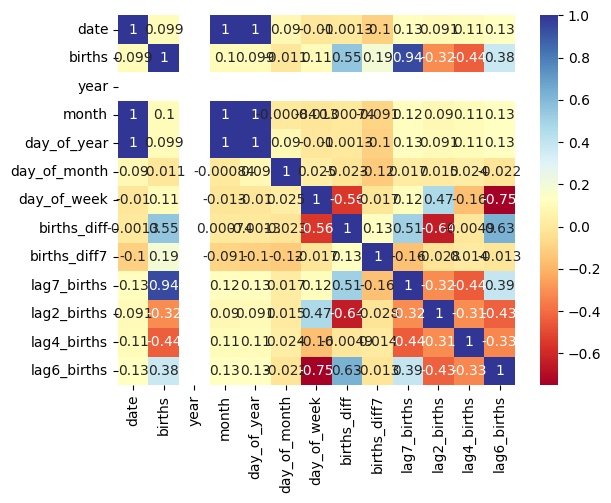

In [85]:
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')

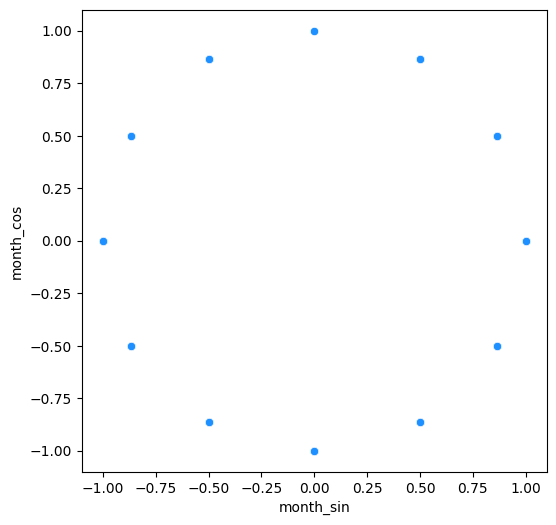

In [86]:
month_in_year = 12
df_train['month_sin'] = np.sin(2*np.pi*df_train['month']/month_in_year)
df_train['month_cos'] = np.cos(2*np.pi*df_train['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df_train.month_sin, y=df_train.month_cos, color='dodgerblue')
plt.show()
df_train['quarter'] = pd.DatetimeIndex(df_train['date']).quarter
df_train['season'] = df_train['month'] % 12 // 3 + 1

Text(0, 0.5, 'Error')

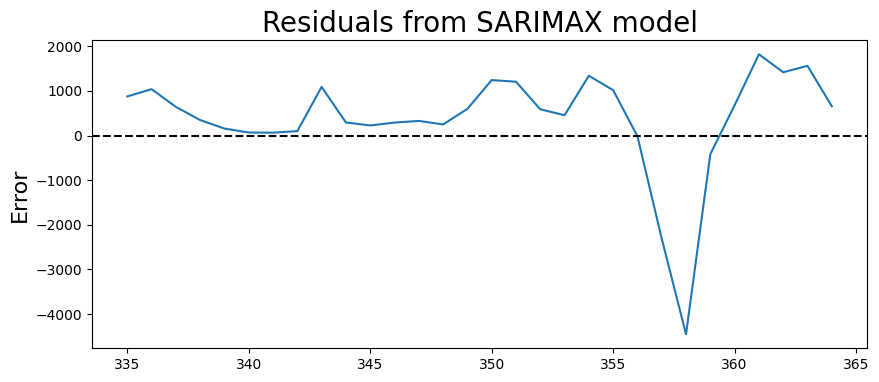

In [174]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle= '--', color='k')
plt.title('Residuals from SARIMAX model', fontsize= 20)
plt.ylabel('Error', fontsize=16)
